# lightboost Feature importance ranking

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        54
         1.0       0.90      0.83      0.86        42

    accuracy                           0.89        96
   macro avg       0.89      0.88      0.88        96
weighted avg       0.89      0.89      0.88        96

              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78        17
         1.0       0.88      0.47      0.61        15

    accuracy                           0.72        32
   macro avg       0.77      0.70      0.69        32
weighted avg       0.76      0.72      0.70        32

[52 63 35  0  4 13  6  1  0 27 24  8 10  9]


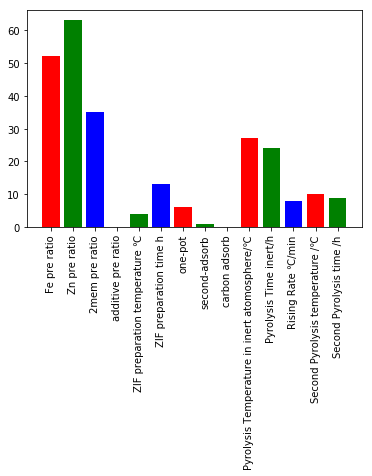

In [4]:
###########import machine learning packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lightgbm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# %matplotlib
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
###########loading data##########
fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[:,[
                      'Fe pre ratio',#0
                      'Zn pre ratio',#1
                      '2mem pre ratio',#2
                      'additive pre ratio',#3
                      'ZIF preparation temperature ℃',#4
                      'ZIF preparation time h',#5
                      'one-pot',#6
                      'second-adsorb',#7
                      'carbon adsorb',#8
                      'Pyrolysis Temperature in inert atomosphere/℃',#9
                      'Pyrolysis Time inert/h',#10
                      'Rising Rate ℃/min',#11
                      'Second Pyrolysis temperature /℃',#12
                      'Second Pyrolysis time /h',#13
                      'qualified pm'#the classification target
                        ]]
###########handling missing values##########
median_raw_data=raw_data.median()
dict_median_raw_data=median_raw_data.to_dict()
data=raw_data.fillna(dict_median_raw_data)
###########train test splitting##########
raw_param=data.iloc[:,0:14]
raw_power=data.iloc[:,14]
X=raw_param.values.astype(np.float32)
y=raw_power.values.astype(np.float32)
###########fix random seed for reproducability##########
seed=544
###########splitting training and testing sets##########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=seed)
###########defining the classifier##########
model_lgbm=lightgbm.LGBMClassifier()
model_lgbm.fit(X_train,y_train)
###########generating confusion matrix to evaluate the prediction accuracy##########
prediction_train=model_lgbm.predict(X_train)
prediction_test=model_lgbm.predict(X_test)
final_result=classification_report(y_test,prediction_test,output_dict=True)
low_MPD_precision=final_result['0.0']['precision']
high_MPD_precision=final_result['1.0']['precision']
print(classification_report(y_train,prediction_train))
print(classification_report(y_test,prediction_test))
###########evaluating and visualization of feature importances##########
print(model_lgbm.feature_importances_)
name_list=['Fe pre ratio',#0
                      'Zn pre ratio',#1
                      '2mem pre ratio',#2
                      'additive pre ratio',#3
                      'ZIF preparation temperature ℃',#4
                      'ZIF preparation time h',#5
                      'one-pot',#6
                      'second-adsorb',#7
                      'carbon adsorb',#8
                      'Pyrolysis Temperature in inert atomosphere/℃',#9
                      'Pyrolysis Time inert/h',#10
                      'Rising Rate ℃/min',#11
                      'Second Pyrolysis temperature /℃',#12
                      'Second Pyrolysis time /h']
plt.bar(range(len(model_lgbm.feature_importances_)), model_lgbm.feature_importances_,color='rgb',tick_label=name_list)
plt.xticks(rotation=90)
plt.show()